In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,NaN,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,NaN,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,NaN,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,NaN,5.0,8.0,3.0,NaN,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,NaN,7.0,6.0,3.0,NaN,3.0,7.0,NaN
19998,NaN,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1013
float64		column 2	1005
float64		column 3	1021
float64		column 4	1043
float64		column 5	973
float64		column 6	1034
float64		column 7	962
float64		column 8	961
float64		column 9	1004
float64		column 10	1024
float64		column 11	945
float64		column 12	991
float64		column 13	1061
float64		column 14	1024
float64		column 15	998
float64		column 16	941
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,18987.000000,18995.000000,18979.000000,18957.000000,19027.000000,18966.000000,19038.000000,19039.000000,18996.000000,18976.000000,19055.000000,19009.000000,18939.000000,18976.000000,19002.000000,19059.000000,0.0
mean,4.022489,7.037378,5.120291,5.371103,3.504862,6.897395,7.501261,4.625295,5.178880,8.279722,6.453267,7.926614,3.046729,8.342274,3.692401,7.800777,NaN
std,1.912075,3.302271,2.017110,2.263576,2.191820,2.027108,2.326836,2.701399,2.382442,2.482224,2.635656,2.079449,2.338067,1.545787,2.560967,1.613911,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

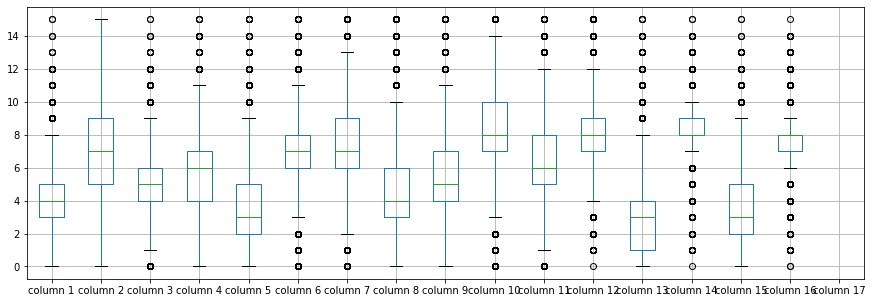

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.022489
column 2     7.037378
column 3     5.120291
column 4     5.371103
column 5     3.504862
column 6     6.897395
column 7     7.501261
column 8     4.625295
column 9     5.178880
column 10    8.279722
column 11    6.453267
column 12    7.926614
column 13    3.046729
column 14    8.342274
column 15    3.692401
column 16    7.800777
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.756454,0.851177,0.673120,0.618724,-0.034065,0.045578,0.015981,0.054380,0.149097,0.036741,-0.042019,0.490270,0.099239,0.273462,-0.107533,NaN
column 2,0.756454,1.000000,0.671021,0.823924,0.553269,0.044197,-0.035356,-0.028604,0.095455,0.163347,-0.052973,-0.007614,0.274577,0.002000,0.227090,-0.045861,NaN
column 3,0.851177,0.671021,1.000000,0.661919,0.765655,0.063897,0.024281,-0.098052,0.056738,0.116825,0.010673,-0.043963,0.559241,0.044674,0.260367,-0.119411,NaN
column 4,0.673120,0.823924,0.661919,1.000000,0.643192,0.041594,-0.018864,0.081324,0.058569,0.013342,-0.011225,0.028611,0.267007,0.027356,0.296482,-0.020876,NaN
column 5,0.618724,0.553269,0.765655,0.643192,1.000000,0.137253,-0.030418,-0.010425,-0.064091,-0.069724,-0.072090,-0.036568,0.629000,0.019501,0.494754,-0.062184,NaN
column 6,-0.034065,0.044197,0.063897,0.041594,0.137253,1.000000,-0.356006,-0.056163,-0.121879,0.085197,-0.345560,-0.030327,0.144345,-0.253186,0.123728,0.249355,NaN
column 7,0.045578,-0.035356,0.024281,-0.018864,-0.030418,-0.356006,1.000000,-0.117601,-0.048016,0.176197,0.601806,-0.269142,-0.033561,0.557031,-0.074824,-0.209585,NaN
column 8,0.015981,-0.028604,-0.098052,0.081324,-0.010425,-0.056163,-0.117601,1.000000,-0.185695,-0.317150,0.041992,0.079567,0.139301,-0.081619,0.009263,0.181107,NaN
column 9,0.054380,0.095455,0.056738,0.058569,-0.064091,-0.121879,-0.048016,-0.185695,1.000000,0.128697,-0.059239,0.115596,-0.383004,-0.050932,0.276226,-0.061992,NaN
column 10,0.149097,0.163347,0.116825,0.013342,-0.069724,0.085197,0.176197,-0.317150,0.128697,1.000000,0.056370,-0.106725,-0.169788,0.031253,-0.084026,-0.114052,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+12,17+12+12,17+12+12+12,17+12+12,17+12,17], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 70.95716507263184
Epoch: 1 , loss: 48.36444659729004
Epoch: 2 , loss: 44.172712741088866
Epoch: 3 , loss: 42.460226161193845
Epoch: 4 , loss: 41.56732879943848
Epoch: 5 , loss: 41.08539510192871
Epoch: 6 , loss: 40.85505631561279
Epoch: 7 , loss: 40.33782331542969
Epoch: 8 , loss: 40.348240242004394
Epoch: 9 , loss: 40.15030998535156
Epoch: 10 , loss: 40.00783419342041
Epoch: 11 , loss: 39.811128903198245
Epoch: 12 , loss: 39.77529336090088
Epoch: 13 , loss: 39.647136375427245
Epoch: 14 , loss: 39.54672264862061
Epoch: 15 , loss: 39.54901822357178
Epoch: 16 , loss: 39.39815030975342
Epoch: 17 , loss: 39.38790634002685
Epoch: 18 , loss: 39.29333028411865
Epoch: 19 , loss: 39.32515977325439
Epoch: 20 , loss: 39.12741822357178
Epoch: 21 , loss: 39.19944517364502
Epoch: 22 , loss: 39.14564866638184
Epoch: 23 , loss: 39.106181533813476
Epoch: 24 , loss: 39.08819864959717
Epoch: 25 , loss: 38.88699468078613


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    0.002368
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-2.506876,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN
1,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN
2,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN
3,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN
4,-2.087275,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-0.448315,0.0,0.0,0.000000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,-2.71366,0.0,0.0,0.0,2.946761,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN
19996,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN
19997,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.239412,0.000000,0.0,0.0,2.283316,0.0,0.0,NaN
19998,0.598386,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

329.99265018646645

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.08837945248416708

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6      4.606300
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.000388
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.00000,4.0,3.0,2.0,7.000000,8.0,2.0,9.0,8.493124,7.000000,7.0,1.0,8.000000,5.0,6.0,-0.003062
1,4.000000,7.00000,5.0,5.0,5.0,5.000000,9.0,6.0,4.0,8.000000,7.000000,9.0,2.0,9.000000,7.0,10.0,-0.002996
2,7.000000,10.00000,8.0,7.0,4.0,8.000000,8.0,5.0,10.0,11.000000,2.000000,8.0,2.0,5.000000,5.0,10.0,0.003104
3,4.000000,9.00000,5.0,7.0,4.0,7.000000,7.0,13.0,1.0,7.000000,6.000000,8.0,3.0,8.000000,0.0,8.0,-0.001397
4,3.912725,7.00000,8.0,5.0,4.0,7.000000,6.0,3.0,7.0,10.000000,6.551685,9.0,3.0,8.000000,3.0,7.0,-0.002305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.000000,7.28634,5.0,8.0,3.0,6.946761,10.0,7.0,8.0,12.000000,10.000000,9.0,2.0,9.000000,2.0,6.0,-0.006279
19996,4.000000,7.00000,6.0,5.0,3.0,7.000000,8.0,2.0,10.0,12.000000,6.000000,8.0,1.0,9.000000,6.0,8.0,-0.003102
19997,4.000000,8.00000,4.0,6.0,4.0,7.000000,8.0,7.0,4.0,11.239412,7.000000,6.0,3.0,11.283316,3.0,7.0,-0.002530
19998,4.598386,11.00000,4.0,8.0,3.0,0.000000,2.0,4.0,6.0,1.000000,0.000000,7.0,0.0,8.000000,0.0,8.0,0.001746


In [21]:
imputations[-1].to_excel("Letter_C_10(imp).xlsx", index=False, header=False)